In [1]:
#load all libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import Dataset and format date
df = pd.read_csv(r"C:\Users\hp\.spyder-py3\Walmart-DataSet-1-1\Walmart DataSet.csv", parse_dates = True)
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", dayfirst=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [16]:
# Let's explore variables, their data types, and total non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [17]:
# Check null
print(df.isnull().sum())
# Check duplicates
print("Dups: ", len(df[df.duplicated()]))

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Dups:  0


In [24]:
# summary statistics of the dataset
df[['Weekly_Sales', 'Temperature', 'CPI']].describe()


,Weekly_Sales,Temperature,CPI
count,6.435000e+03,6435.000000,6435.000000
mean,1.046965e+06,60.663782,171.578394
std,5.643666e+05,18.444933,39.356712
min,2.099862e+05,-2.060000,126.064000
25%,5.533501e+05,47.460000,131.735000
50%,9.607460e+05,62.670000,182.616521
75%,1.420159e+06,74.940000,212.743293
max,3.818686e+06,100.140000,227.232807


In [30]:
df.boxplot(["Store"])


<AxesSubplot:title={'center':'Basic Plot'}>

In [31]:
df.boxplot(["Weekly_Sales"])

<AxesSubplot:title={'center':'Basic Plot'}>

In [33]:
df.boxplot(["Unemployment"])

<AxesSubplot:title={'center':'Basic Plot'}>

In [32]:
df.boxplot(["Fuel_Price"])

<AxesSubplot:title={'center':'Basic Plot'}>

In [34]:
df.boxplot(["CPI"])

<AxesSubplot:title={'center':'Basic Plot'}>

In [35]:
df.boxplot(["Holiday_Flag"])

<AxesSubplot:title={'center':'Basic Plot'}>

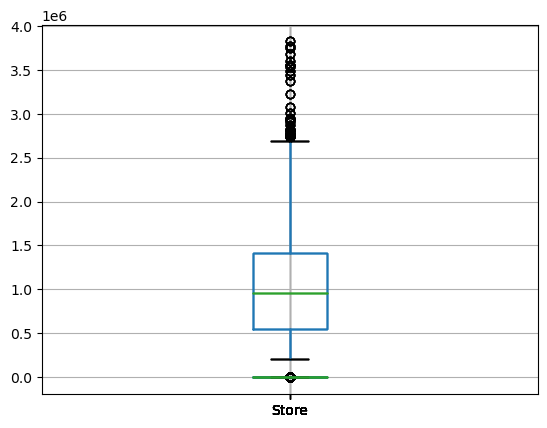

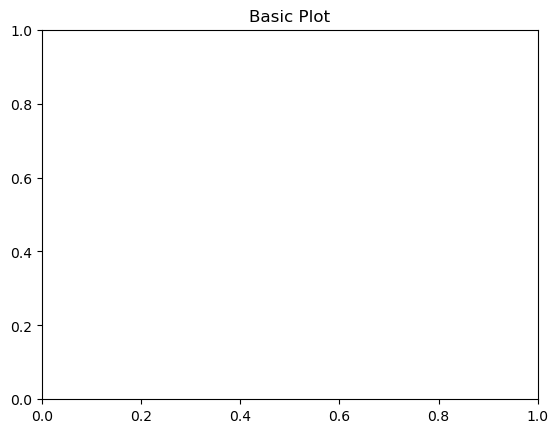

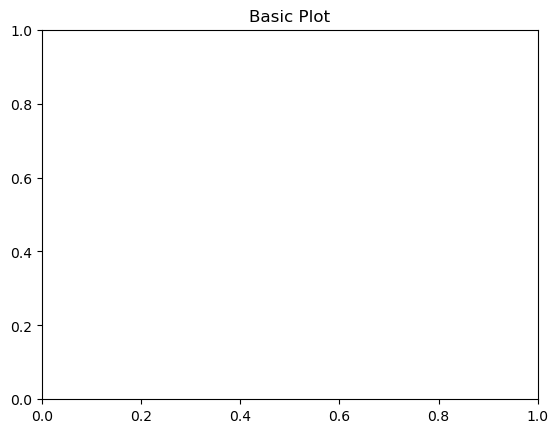

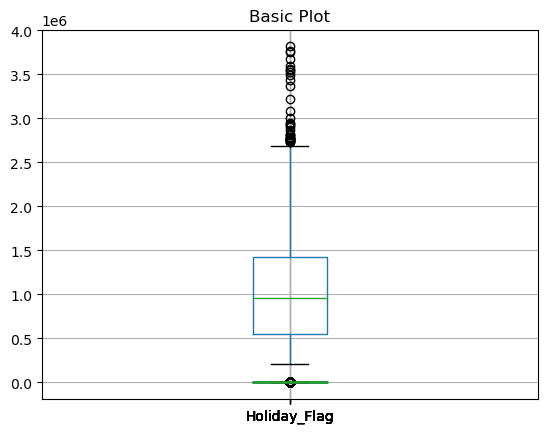

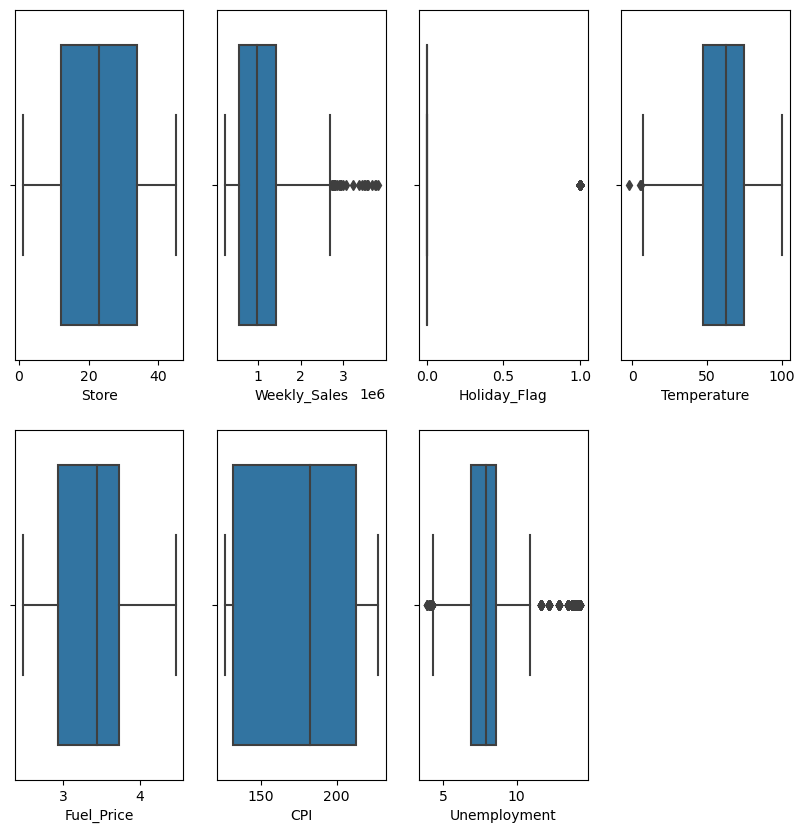

In [36]:
plt.figure(figsize=(10,10))
count=1
plt.subplot(2,4,count)
sns.boxplot(df.Store)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Weekly_Sales)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Holiday_Flag)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Temperature)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Fuel_Price)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.CPI)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Unemployment)
plt.show()

In [37]:
def remove_outliers(df,columnName):
    q1= np.percentile(df[columnName],0.25)
    q3= np.percentile(df[columnName],0.75)
    iqr = q3 - q1
    ul =q3 + 1.5*q3
    ll =q1 - 1.5*q1
    df= df[(df[columnName] > ll) & (df[columnName] < ul)]
    return df

In [39]:
df = remove_outliers(df,"Weekly_Sales")

In [40]:
sns.boxplot(df['Weekly_Sales'])

<AxesSubplot:xlabel='Weekly_Sales'>

In [41]:
df = remove_outliers(df,"Unemployment")

In [42]:
sns.boxplot(df['Unemployment'])

<AxesSubplot:xlabel='Unemployment'>

In [44]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))


Min Date in Data is - 2010-02-05 00:00:00
Max Date in Data is - 2012-10-26 00:00:00



Q.1
a) If the weekly sales are affected by the unemployment rate,
if yes - which stores are suffering the most?


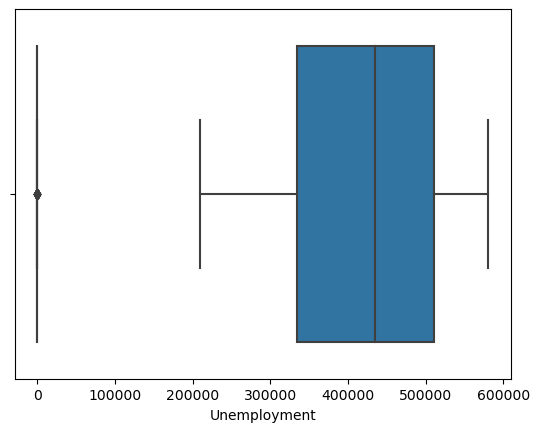

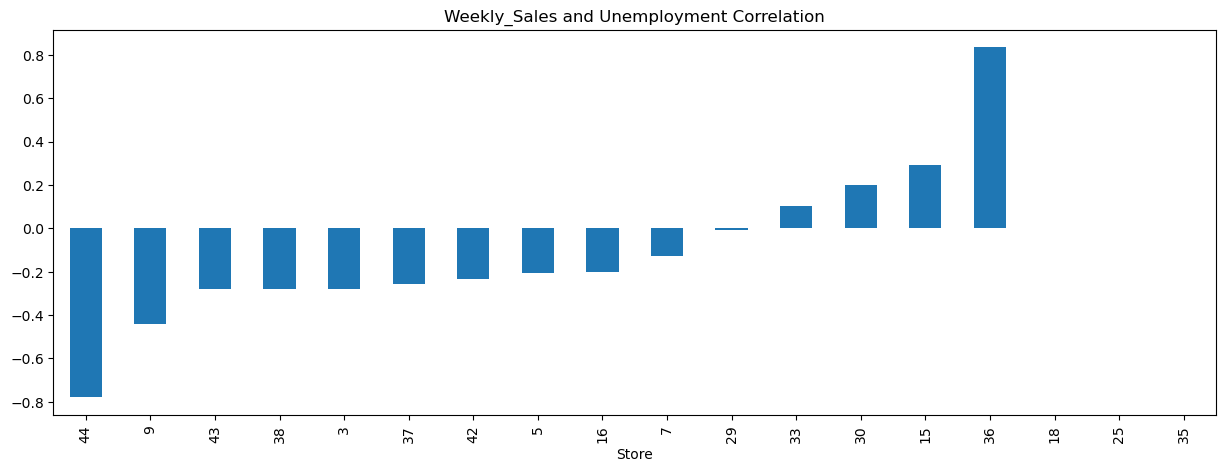

In [45]:
print('''\nQ.1\na) If the weekly sales are affected by the unemployment rate,
if yes - which stores are suffering the most?''')
df_grp_store = df.groupby("Store")
corr_ws_u = df_grp_store.apply(lambda group: group["Weekly_Sales"].corr(group["Unemployment"]))
corr_ws_u_asc = corr_ws_u.sort_values(ascending=True)
mas = [i for i in corr_ws_u_asc.head(3).index]

fig1a, ax1a = plt.subplots(figsize=(15, 5))
ax1a = corr_ws_u_asc.plot.bar()
ax1a.set_title("Weekly_Sales and Unemployment Correlation")
plt.show()

In [46]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Holiday_Flag', y ='Weekly_Sales', data = df, showfliers = False)


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

In [47]:
print(f'''{len(corr_ws_u_asc[corr_ws_u_asc > 0])} stores show +ve correlation:
{[i for i in corr_ws_u_asc[corr_ws_u_asc > 0].index]}.
{len(corr_ws_u_asc[corr_ws_u_asc < 0])} stores show -ve correlation:
{[i for i in corr_ws_u_asc[corr_ws_u_asc < 0].index]}.
The 3 most affected stores suffering from increasing unemployment are {mas}.''')


4 stores show +ve correlation:
[33, 30, 15, 36].
11 stores show -ve correlation:
[44, 9, 43, 38, 3, 37, 42, 5, 16, 7, 29].
The 3 most affected stores suffering from increasing unemployment are [44, 9, 43].


In [48]:
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price','CPI', 'Unemployment']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)


<AxesSubplot:>


b) If the weekly sales show a seasonal trend, when and what could be
the reason?


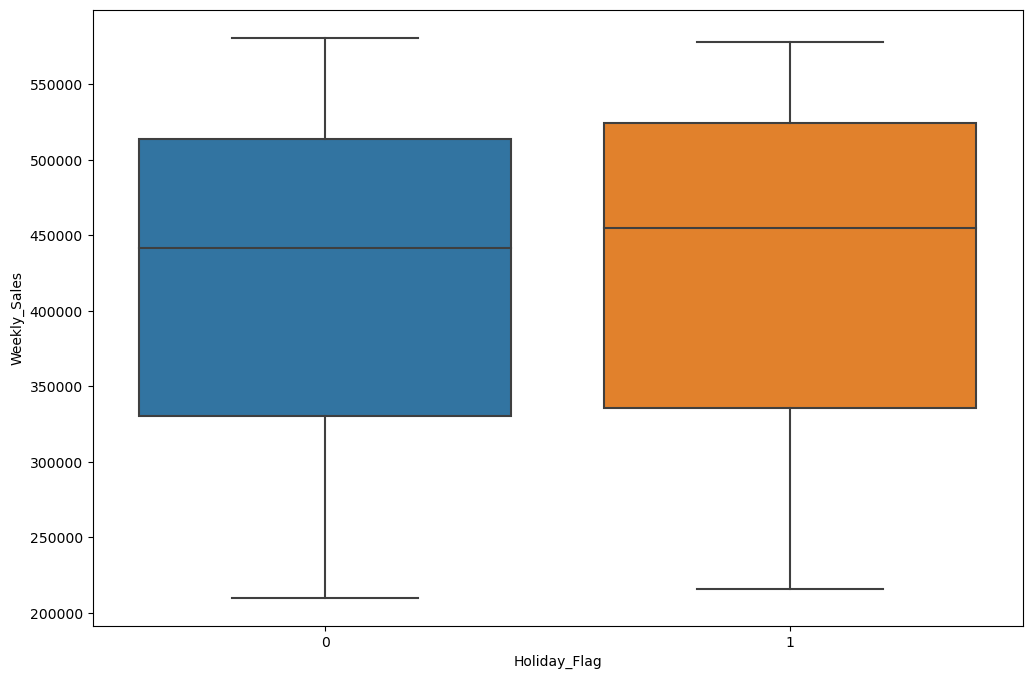

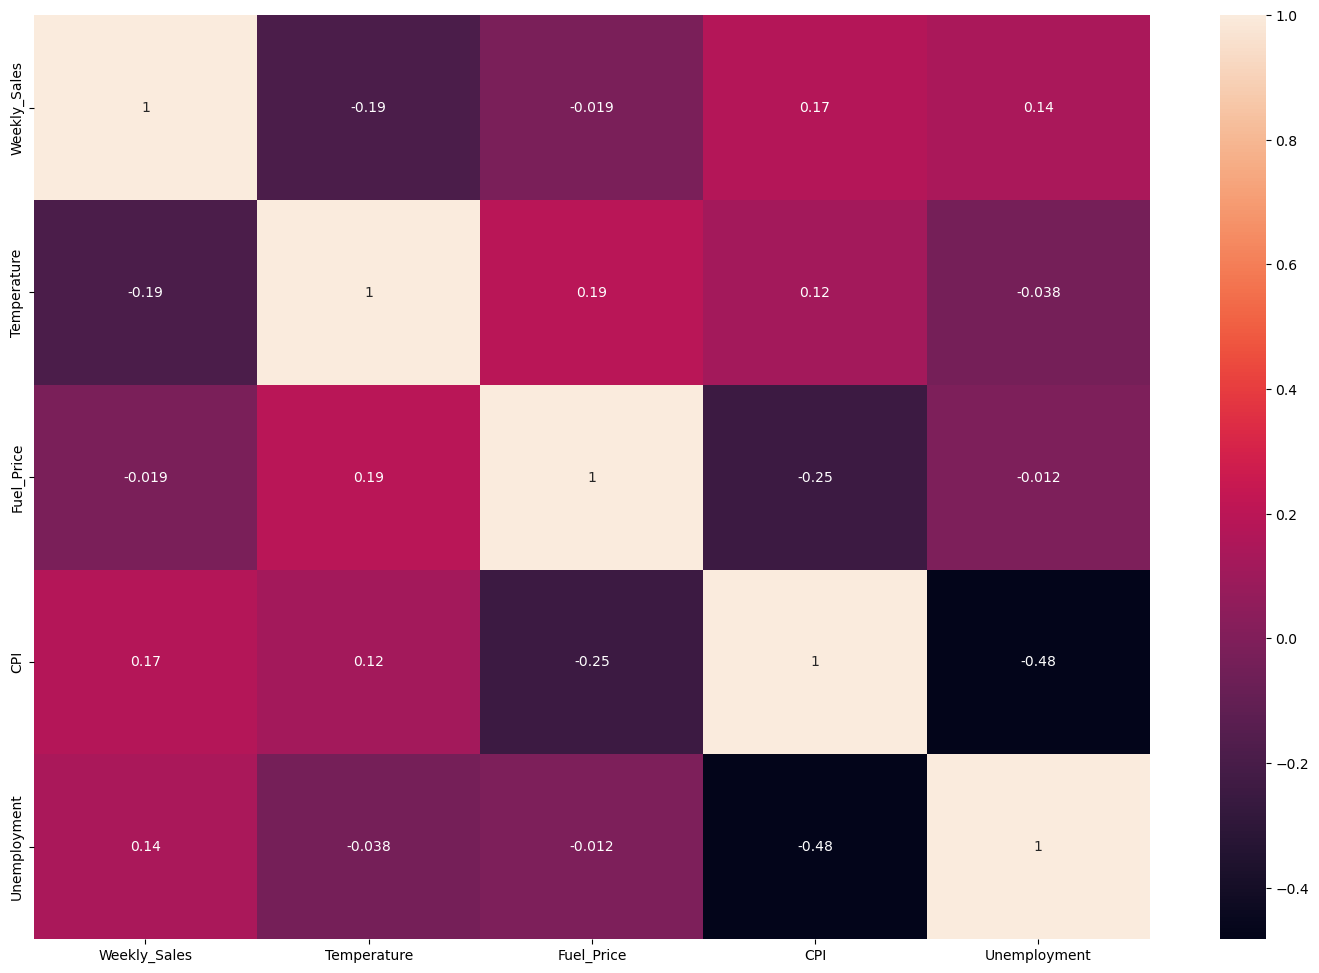

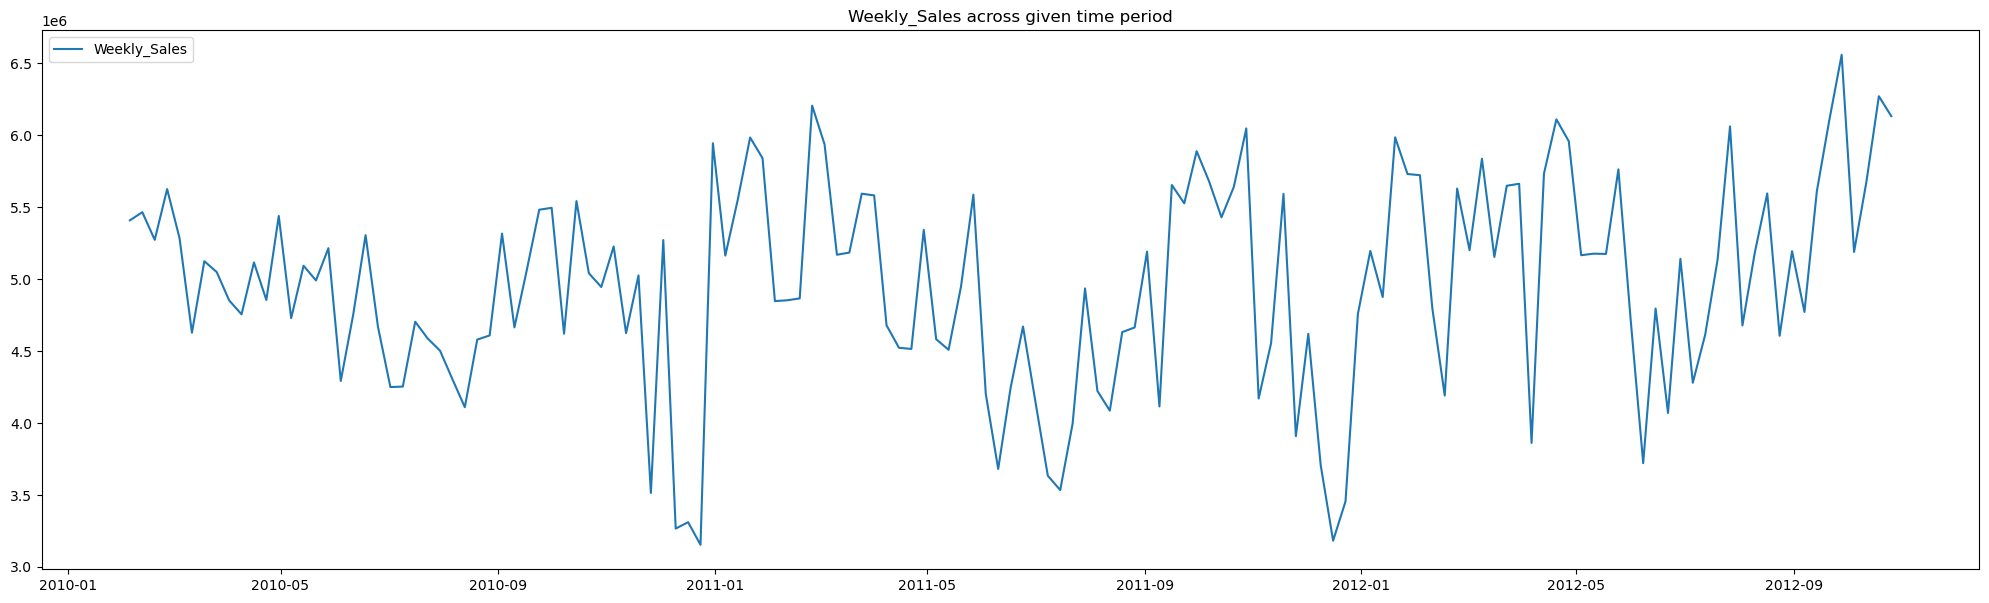

In [49]:
print('''\nb) If the weekly sales show a seasonal trend, when and what could be
the reason?''')
df_grp_date = df.groupby("Date")
agg_weekly_sales = df_grp_date.agg(agg_wsales = ("Weekly_Sales", sum))

fig1b, ax1b = plt.subplots(figsize=(25, 7))
ax1b.plot(agg_weekly_sales.index, agg_weekly_sales["agg_wsales"], label="Weekly_Sales")
ax1b.set_title("Weekly_Sales across given time period")
ax1b.legend()
plt.show()

In [50]:
print('''The weekly sales have a seasonal trend as shown in the graph.
Sales rises in the months of Oct, Nov and reaches its peak in Dec, then drops.
The reason can be because of -
Festive season of diwali, christmas and related promotional offers.''')


The weekly sales have a seasonal trend as shown in the graph.
Sales rises in the months of Oct, Nov and reaches its peak in Dec, then drops.
The reason can be because of -
Festive season of diwali, christmas and related promotional offers.



c) Does temperature affect the weekly sales in any manner?


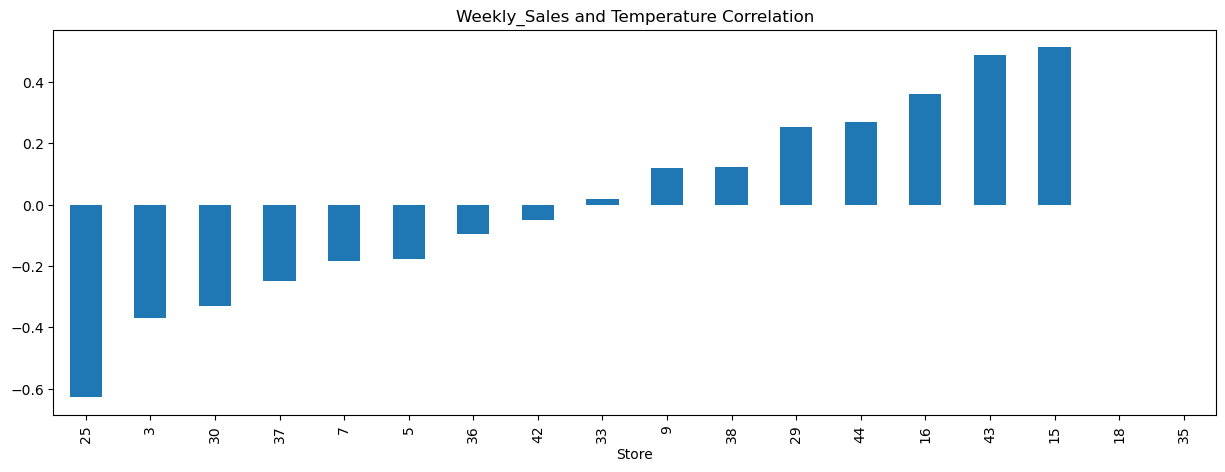

In [51]:
print('''\nc) Does temperature affect the weekly sales in any manner?''')
corr_ws_t = df_grp_store.apply(lambda group: group["Weekly_Sales"].corr(group["Temperature"]))
corr_ws_t_asc = corr_ws_t.sort_values(ascending=True)

fig1c, ax1c = plt.subplots(figsize=(15,5))
ax1c = corr_ws_t_asc.plot.bar()
ax1c.set_title("Weekly_Sales and Temperature Correlation")
plt.show()

In [52]:
print(f'''{len(corr_ws_t_asc[corr_ws_t_asc > 0])} stores show +ve correlation:
{[i for i in corr_ws_t_asc[corr_ws_t_asc > 0].index]}.
{len(corr_ws_t_asc[corr_ws_t_asc < 0])} stores show -ve correlation:
{[i for i in corr_ws_t_asc[corr_ws_t_asc < 0].index]}.''')

8 stores show +ve correlation:
[33, 9, 38, 29, 44, 16, 43, 15].
8 stores show -ve correlation:
[25, 3, 30, 37, 7, 5, 36, 42].



d) How is the Consumer Price index affecting the weekly sales of
various stores?


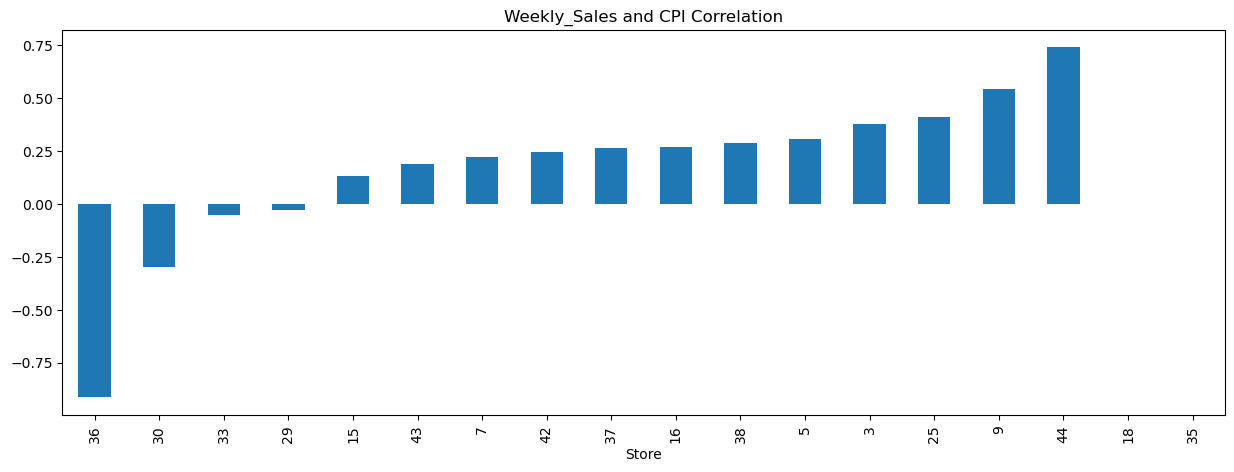

In [53]:
print('''\nd) How is the Consumer Price index affecting the weekly sales of
various stores?''')
corr_ws_c = df_grp_store.apply(lambda group: group["Weekly_Sales"].corr(group["CPI"]))
corr_ws_c_asc = corr_ws_c.sort_values(ascending=True)

fig1d, ax1d = plt.subplots(figsize=(15,5))
ax1d = corr_ws_c_asc.plot.bar()
ax1d.set_title("Weekly_Sales and CPI Correlation")
plt.show()

In [54]:
print(f'''{len(corr_ws_c_asc[corr_ws_c_asc > 0])} stores show +ve correlation:
{[i for i in corr_ws_c_asc[corr_ws_c_asc > 0].index]}.
{len(corr_ws_c_asc[corr_ws_c_asc < 0])} stores show -ve correlation:
{[i for i in corr_ws_c_asc[corr_ws_c_asc < 0].index]}.''')


12 stores show +ve correlation:
[15, 43, 7, 42, 37, 16, 38, 5, 3, 25, 9, 44].
4 stores show -ve correlation:
[36, 30, 33, 29].



e) Top performing stores according to the historical data.


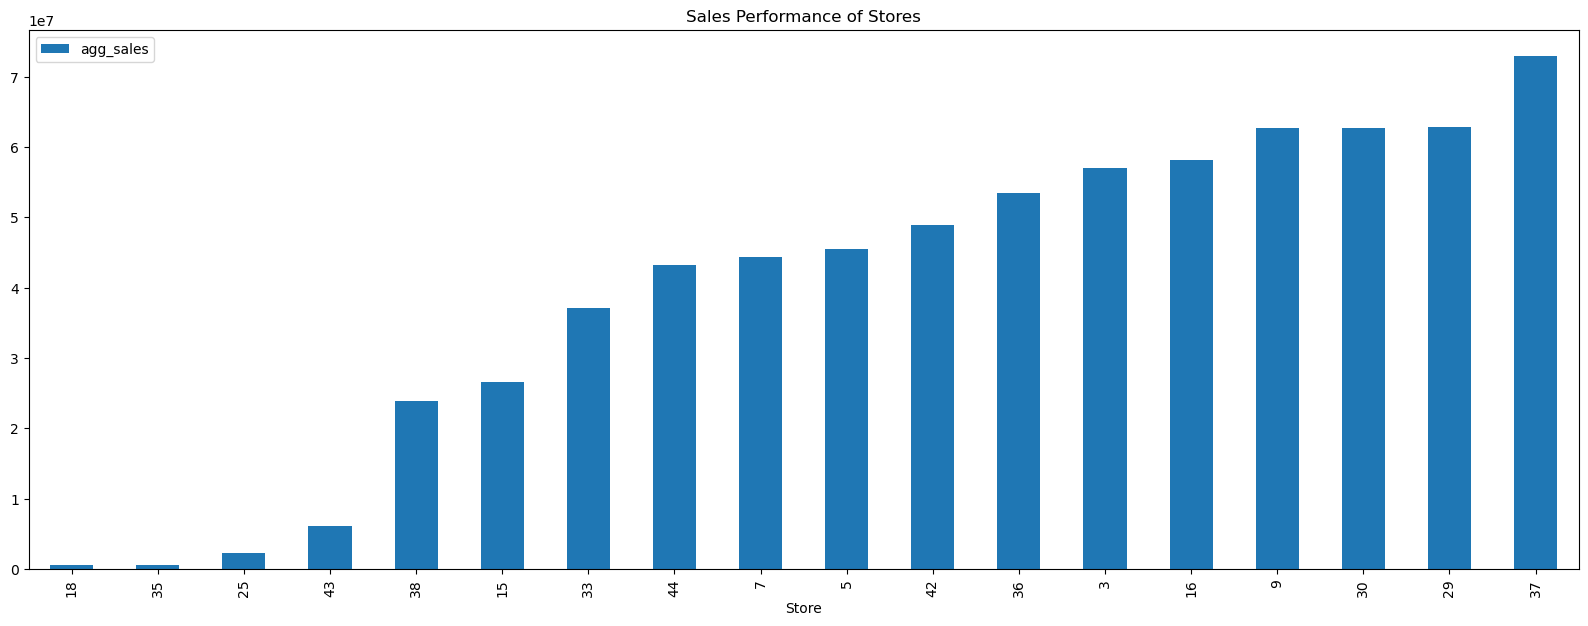

In [55]:
print('''\ne) Top performing stores according to the historical data.''')
agg_store_sales = df_grp_store.agg(agg_sales = ("Weekly_Sales", sum))
agg_store_sales_asc = agg_store_sales.sort_values(by="agg_sales", ascending=True)
mps = [i for i in agg_store_sales_asc.tail(10).index]

ax1e = agg_store_sales_asc.plot.bar(figsize=(20,7))
ax1e.set_title("Sales Performance of Stores")
plt.show()


In [56]:
print(f'''Top 10 performing stores in the decreasing order of performance:
{mps[::-1]}''')

Top 10 performing stores in the decreasing order of performance:
[37, 29, 30, 9, 16, 3, 36, 42, 5, 7]


In [57]:
print('''\nf) The worst performing store, and how significant is the difference
between the highest and lowest performing stores.''')
wps = [i for i in agg_store_sales_asc.head(1).index]
print(f"The worst performing store: Store {wps}.")

diff_hl = round(agg_store_sales_asc["agg_sales"].max() - agg_store_sales_asc["agg_sales"].min())
print(f"Difference between the highest and lowest performing store: {diff_hl}")


f) The worst performing store, and how significant is the difference
between the highest and lowest performing stores.
The worst performing store: Store [18].
Difference between the highest and lowest performing store: 72472191


In [58]:
# create year, month, and date
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)

# one hot encoding
cols_to_encode = ['Holiday_Flag']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', ]
transformed_features = standard_scaler.fit_transform(df[feature_cols])

df[feature_cols] = transformed_features

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Weekly_Sales'], test_size = 0.2, random_state = 1234)


In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')


MAE is - 46921.07864264264
RMSE is - 60780.54060577983
Accuracy Score is - 0.5965574478750719


In [ ]:
'''As we can see in the above figure, the r-squared score is only 0.49. 
Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data.'''

In [60]:
# scatter plot between observed and predicted values of weekly sales from KNN regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


<AxesSubplot:xlabel='Weekly_Sales'>

In [ ]:
'''As you can see in the above figure, predicted and observed values have low correlation, 
and points in the plot are spread out. Let’s train a Decision Tree Regressor to check whether
we get any improvement in the r-squared score or not.'''

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred=lr.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
linearRegressionError=mean_squared_error(y_test,y_pred)
linearRegressionError

7788581931.111538

In [65]:
r2_score(y_test,y_pred)*100

14.94282035458121

In [12]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')


MAE is - 72333.67241647241
RMSE is - 144408.70639817097
Accuracy Score is - 0.9304619284094419


In [13]:
'''As we can see in the above figure, with Decision Tree Regressor, we get a huge improvement in both RMSE and r-squared 
score. We get an r-squared score of 0.93.Let’s train a Random Forest Regressor and check whether we get any further
improvement.'''

'As we can see in the above figure, with Decision Tree Regressor, we get a huge improvement in both RMSE and r-squared \nscore. We get an r-squared score of 0.93.Let’s train a Random Forest Regressor and check whether we get any further\nimprovement.'

In [14]:
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')


MAE is - 54666.875720657044
RMSE is - 100144.5703955346
Accuracy Score is - 0.9665581185335829


In [ ]:
'''We were able to gain slight improvement in RMSE and r-squared score.With Random Forest, we got an r-squared score of
0.96.'''

In [ ]:
'''Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data.'''


<AxesSubplot:xlabel='Weekly_Sales'>

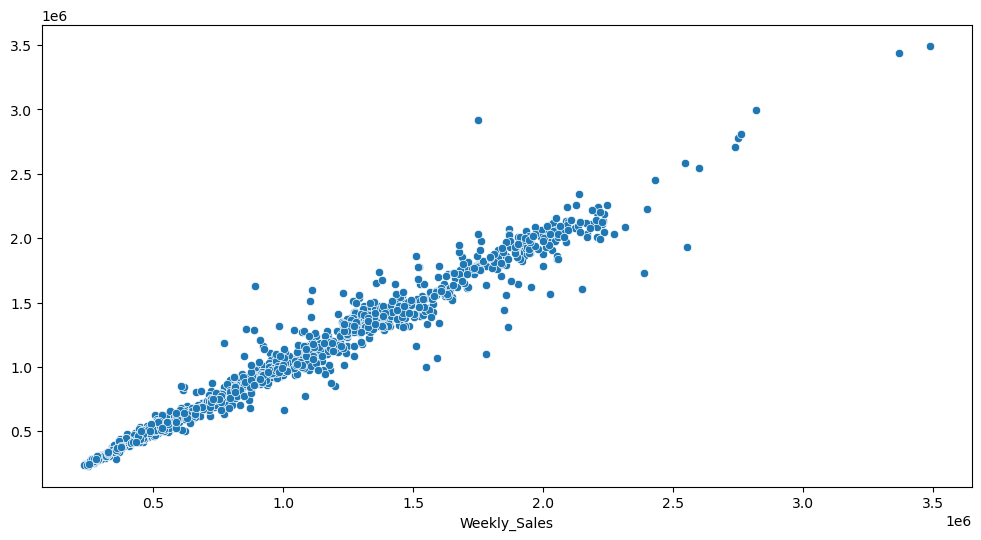

In [15]:
# scatter plot between observed and predicted values of weekly sales from XGBoost regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


In [ ]:
'''As you can see, points in the plot are very tightly distributed, and observed and predicted values of weekly sales 
have a strong correlation.'''

In [ ]:
'''As you can see, Random Forest Regressor has given the highest r-squared score and lowest MAE and RMSE. 
Thus, we can conclude that for this problem, Random Forest Regressor works best.'''

In [ ]:
# Deploy the SARIMA Model

Model Performance:
Root Mean Squared Error (RMSE): 43858.16551714557
Mean Absolute Error (MAE): nan


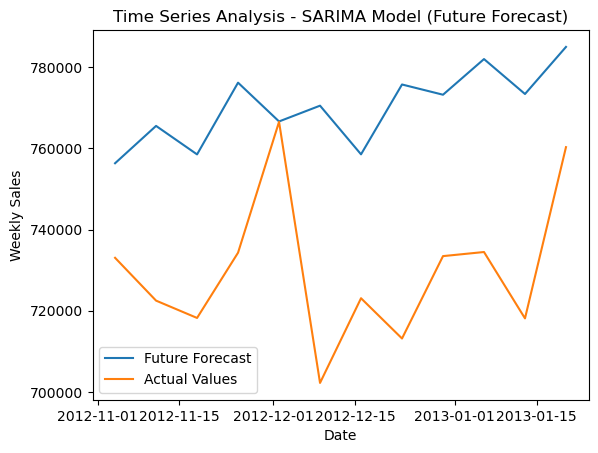

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Train the SARIMA model on the entire dataset
model = SARIMAX(df['Weekly_Sales'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the future periods
future_periods = 12  # Number of future periods to forecast
future_predictions = model_fit.forecast(steps=future_periods)

# Get the actual values for the future periods
actual_values = df['Weekly_Sales'].tail(future_periods)

# Calculate the accuracy of the predictions
mse = mean_squared_error(actual_values, future_predictions)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(future_predictions - actual_values))

# Print the accuracy metrics
print("Model Performance:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Plot the future forecast
future_dates = pd.date_range(start=df['Date'].max(), periods=future_periods+1, freq='W')[1:]
plt.plot(future_dates, future_predictions, label='Future Forecast')
plt.plot(future_dates, actual_values, label='Actual Values')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Time Series Analysis - SARIMA Model (Future Forecast)')
plt.legend()
plt.show()

In [18]:
import pickle

# Save the trained model to a file
with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

In [19]:
# Load the trained model from the file
with open('sarima_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the test data
test_data = pd.read_csv('test_data.csv')

# Make predictions on the test data using the loaded model
predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Print the predicted values
print(predictions)

FileNotFoundError: [Errno 2] No such file or directory: 'test_data.csv'

In [20]:
# Split the data into training and test sets
train = df.iloc[:-10]
test = df.iloc[-10:]

In [9]:
# Select the endogenous variable to forecast (i.e., 'Weekly_Sales')
endog_train = train['Weekly_Sales']
endog_test = test['Weekly_Sales']

In [14]:
# Fit a SARIMAX model
model = SARIMAX(endog_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 52))
results = model.fit()

MemoryError: Unable to allocate 551. MiB for an array with shape (106, 106, 6426) and data type float64

In [15]:
# Forecast future sales for the next 10 weeks
forecast = results.forecast(steps=10)
print(forecast)

NameError: name 'results' is not defined